In [1]:
from prody import *
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### document version of libraries used

print("prody version: {}".format(prody.__version__))
print("matplotlib version: {}".format(matplotlib.__version__))

prody version: 2.3.1
matplotlib version: 3.4.0


In [3]:
lys_200 = parsePDB("./models_ANM/lys_200_for_anm_modified.pdb", subset='calpha')

@> 129 atoms and 1 coordinate set(s) were parsed in 0.00s.


In [4]:
lys_200_selection = lys_200.select('resnum < 130')

In [5]:
anm_200, atoms_200 = calcANM(lys_200_selection)
anm_200 = ANM('All Modes')
anm_200.buildHessian(lys_200_selection)
anm_200.calcModes()

@> Hessian was built in 0.05s.
@> 20 modes were calculated in 0.01s.
@> Hessian was built in 0.04s.
@> 20 modes were calculated in 0.01s.


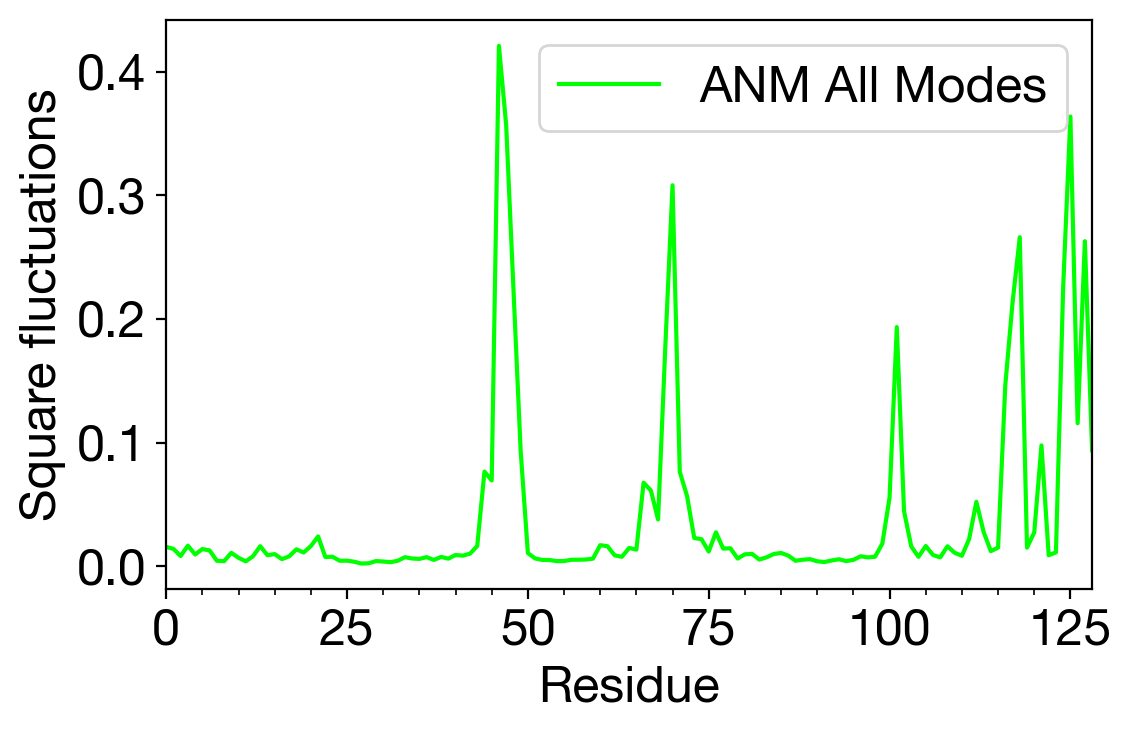

In [6]:
plt.rcParams.update({'font.sans-serif':'Helvetica Neue'})
plt.rcParams.update({'font.size': 18})
plt.figure(dpi=200)
showNormedSqFlucts(anm_200, color='lime')
legend()
title(None)
plt.tight_layout()

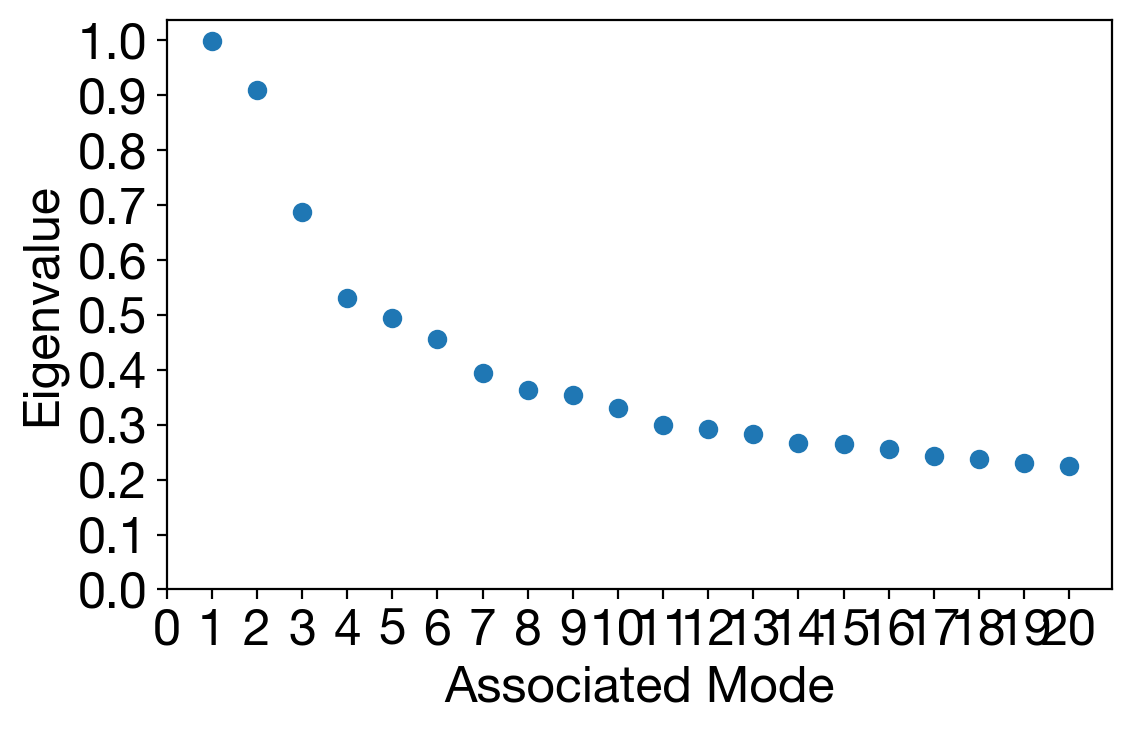

In [7]:
plt.figure(dpi=200)
plt.scatter(np.arange(1, len(anm_200.getEigvals())+1, 1.0), 1/anm_200.getEigvals())
plt.xticks(np.arange(0, len(anm_200.getEigvals())+1, 1.0))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Eigenvalue")
plt.xlabel("Associated Mode")
plt.tight_layout()

In [8]:
def combine_modes(input_anm_model, number_of_modes):
    combined_vector = np.zeros_like(input_anm_model[0].getArray())
    for mode in input_anm_model[:number_of_modes]:
        scale_factor = np.sqrt(1/input_anm_model[mode].getEigval())
        combined_vector += scale_factor * input_anm_model[mode].getArray()
    return combined_vector

def deform_model_by_vector(input_pdb_string, residue_limit, input_mode, output_pdb_string):
    model = parsePDB(input_pdb_string, subset='calpha')
    model_selection = model.select('resnum < {}'.format(residue_limit))
    model_selection.setCoords(model_selection.getCoords() + input_mode.reshape(len(model_selection.getIndices()),3))
    writePDB(output_pdb_string, model_selection)
    return

In [9]:
lys_200_deformed = lys_200_selection = lys_200.select('resnum < 130')
lys_200_deformed.setCoords(lys_200_deformed.getCoords() - 22*anm_200[0].getArray().reshape(129,3))
writePDB('./models_ANM/lys_200_anm_deformation_mode-1_multiplier-22-0.pdb', lys_200_deformed)

'./models_ANM/lys_200_anm_deformation_mode-1_multiplier-22-0.pdb'